#### 2018312343 염예빈

## 6주차 실습과제 : 머신러닝과 딥러닝

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epoch = 12

In [12]:
img_rows, img_cols = 28,28
(x_train,y_train),(x_test,y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
  x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
  input_shape = (1,img_rows,img_cols)
else: 
  x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
  x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
  input_shape = (img_rows,img_cols,1)

In [14]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs = epoch,
          verbose=1)

Epoch 1/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.3408 - accuracy: 0.8971
Epoch 2/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.1399 - accuracy: 0.9584
Epoch 3/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.1049 - accuracy: 0.9689
Epoch 4/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0900 - accuracy: 0.9726
Epoch 5/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.0794 - accuracy: 0.9762
Epoch 6/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0708 - accuracy: 0.9781
Epoch 7/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.0639 - accuracy: 0.9803
Epoch 8/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0601 - accuracy: 0.9818
Epoch 9/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0548 - accuracy: 0.9833
Epoch 10/12
60000/60000 [==============================

In [21]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss : ',score[0])
print('Test acc : ',score[1])

Test loss :  0.0369082065519935
Test acc :  0.9873999953269958


In [22]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(32,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [23]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model2.fit(x_train,y_train,
          batch_size=batch_size,
          epochs = epoch,
          verbose=1)
score=model2.evaluate(x_test,y_test,verbose=0)
print('Test loss : ',score[0])
print('Test acc : ',score[1])

Epoch 1/12
60000/60000 [==============================] - 4s 60us/step - loss: 0.2990 - accuracy: 0.9079
Epoch 2/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.1018 - accuracy: 0.9696
Epoch 3/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0744 - accuracy: 0.9779
Epoch 4/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0633 - accuracy: 0.9805
Epoch 5/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0574 - accuracy: 0.9831
Epoch 6/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0478 - accuracy: 0.9855
Epoch 7/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0461 - accuracy: 0.9866
Epoch 8/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0426 - accuracy: 0.9871
Epoch 9/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0394 - accuracy: 0.9882
Epoch 10/12
60000/60000 [==============================

In [5]:
##13장

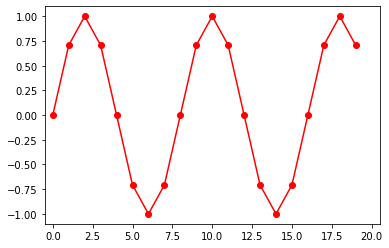

In [1]:
import numpy as np
from matplotlib import pyplot as plt
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s,'ro-')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.show() 

In [4]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [5]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1,3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [7]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


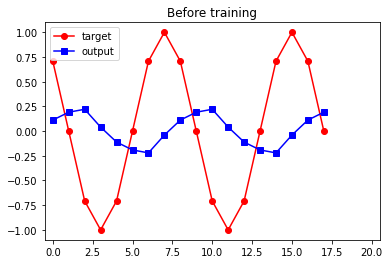

In [9]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('Before training')
plt.show()

In [10]:
history = model.fit(X_train,Y_train, epochs = 100, verbose=0)

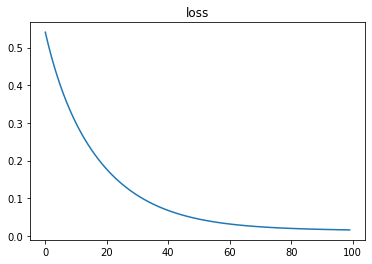

In [11]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

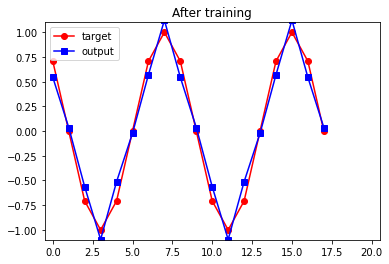

In [12]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()

In [2]:
from tensorflow.keras.datasets import reuters

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print('Train data : {}'.format(len(X_train)))
print('Test data : {}'.format(len(X_test)))
num_classes = max(Y_train) + 1
print('class : {}'.format(num_classes))

Train data : 8982
Test data : 2246
class : 46


In [4]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


In [5]:
index_word={}
for key,value in word_index.items():
  index_word[value] = key

from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [6]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [7]:
model = Sequential()
model.add(Embedding(1000,120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', save_best_only =True)
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics = ['acc'])

In [8]:
history= model.fit(X_train, Y_train, batch_size=128, epochs=10, callbacks=[es,mc], validation_split=0.2)

Epoch 1/10
57/57 [==============================] - 3s 50ms/step - loss: 2.6546 - acc: 0.3488 - val_loss: 2.4115 - val_acc: 0.3450
Epoch 2/10
57/57 [==============================] - 2s 39ms/step - loss: 2.3525 - acc: 0.3834 - val_loss: 2.1779 - val_acc: 0.4580
Epoch 3/10
57/57 [==============================] - 2s 38ms/step - loss: 2.0705 - acc: 0.4881 - val_loss: 2.0127 - val_acc: 0.4997
Epoch 4/10
57/57 [==============================] - 2s 37ms/step - loss: 1.9643 - acc: 0.5111 - val_loss: 2.9819 - val_acc: 0.3606
Epoch 5/10
57/57 [==============================] - 2s 37ms/step - loss: 1.8846 - acc: 0.5208 - val_loss: 1.7680 - val_acc: 0.5387
Epoch 6/10
57/57 [==============================] - 2s 37ms/step - loss: 1.7294 - acc: 0.5613 - val_loss: 1.7567 - val_acc: 0.5543
Epoch 7/10
57/57 [==============================] - 2s 38ms/step - loss: 1.6948 - acc: 0.5691 - val_loss: 1.6942 - val_acc: 0.5576
Epoch 8/10
57/57 [==============================] - 2s 38ms/step - loss: 1.6273 - a

In [10]:
loaded = load_model('best_model.h5')
print("\n 테스트정확도 : %.4f" % (loaded.evaluate(X_test, Y_test)[1]))

71/71 [==============================] - 1s 12ms/step - loss: 1.5652 - acc: 0.6113

 테스트정확도 : 0.6113


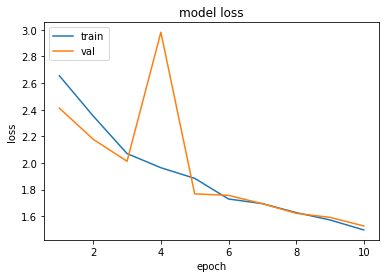

In [12]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [1]:
import numpy as np
from matplotlib import pyplot as plt
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))

X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1,3]

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

np.random.seed(0)
model = Sequential()
model.add(LSTM(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


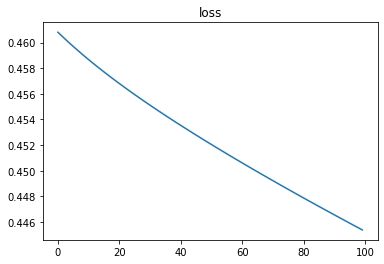

In [3]:
history = model.fit(X_train,Y_train, epochs = 100, verbose=0)
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

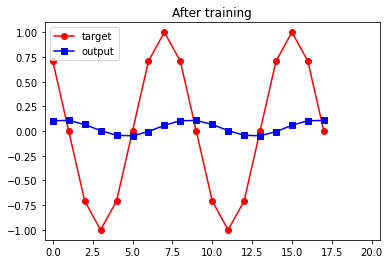

In [4]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()

In [7]:
history = model.fit(X_train,Y_train, epochs = 2000, verbose=0)

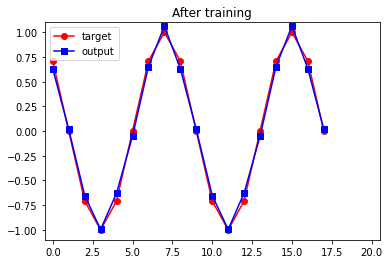

In [8]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import GRU, Dense

np.random.seed(0)
model = Sequential()
model.add(GRU(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train,Y_train, epochs = 100, verbose=0)

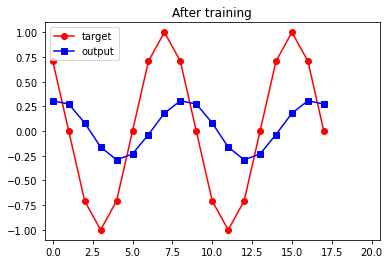

In [11]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()